# IMPORT LIBRARIES

In [1]:
import numpy as np
import cv2
from scipy import misc, interpolate
from scipy.ndimage import affine_transform, zoom
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import imageio

from skimage import io, img_as_ubyte, img_as_float
from skimage.transform import rescale
from skimage.color import rgb2lab, lab2rgb, rgba2rgb
from skimage.io import imread, imsave, imshow, show, imshow_collection, imread_collection
from skimage import color, exposure, viewer, data
from skimage.util import invert, random_noise, montage
from skimage.transform import SimilarityTransform, warp, swirl

import ipywidgets as widgets

C:\Users\Business\anaconda3\lib\site-packages\skimage\viewer\utils\__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *


# Select Image From Drop Down

In [2]:
import os

def load_images_from_folder(foldername):
    images = []
    for filename in os.listdir(foldername):
        img = os.path.join(foldername,filename)
        if img is not None:
            images.append(img)
    return images
img_list=load_images_from_folder("images")

image_dropdown = widgets.Dropdown(
    options=img_list,
    value=img_list[0],
    description='Select Image:',
    disabled=False,
)
display(image_dropdown)

Dropdown(description='Select Image:', options=('images\\Camila Cabello.png', 'images\\flowers.png', 'images\\h…

# Run All Cells From this Point

Display Image

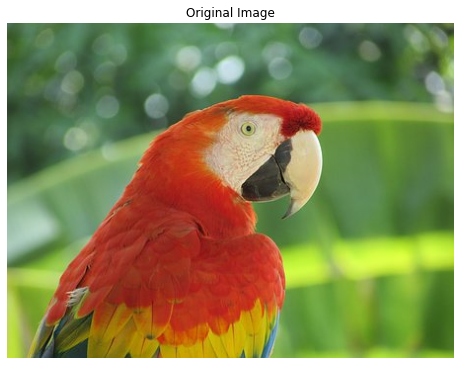

In [3]:
img = cv2.imread(image_dropdown.value)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis("off")
plt.title("Original Image")
plt.show()

# Pencil Sketch

Display Grayscale Image

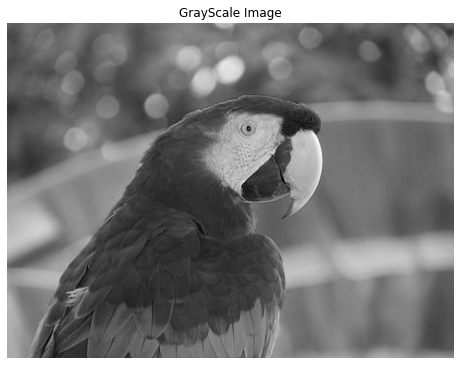

In [4]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(8,8))
plt.imshow(img_gray,cmap="gray")
plt.axis("off")
plt.title("GrayScale Image")
plt.show()

In [5]:
img_gray

array([[105, 105, 104, ..., 103, 102, 102],
       [105, 104, 103, ..., 101, 100, 100],
       [104, 104, 102, ..., 103, 101, 100],
       ...,
       [170, 171, 171, ..., 131, 131, 130],
       [170, 171, 171, ..., 138, 137, 138],
       [170, 171, 171, ..., 143, 142, 142]], dtype=uint8)

Smoothen Grayscale Image

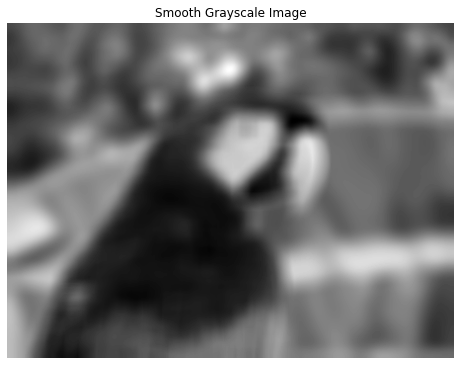

In [6]:
filter_size = (19, 19)

img_smooth = cv2.blur(img_gray, filter_size, cv2.BORDER_REFLECT)
plt.figure(figsize=(8,8))
plt.imshow(img_smooth,cmap="gray")
plt.axis("off")
plt.title("Smooth Grayscale Image")
plt.show()

Divide Gray Image by Smooth Image

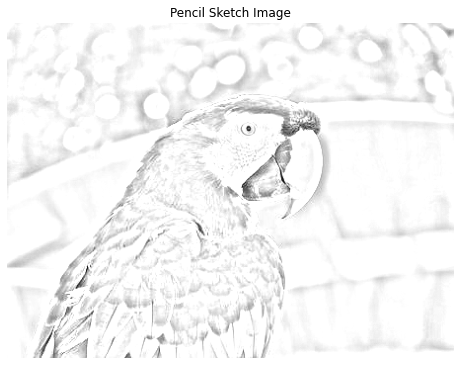

In [7]:
pencil_sketch = cv2.divide(img_gray, img_smooth, scale=255)

plt.figure(figsize=(8,8))
plt.imshow(pencil_sketch,cmap="gray")
plt.axis("off")
plt.title("Pencil Sketch Image")
plt.show()

##                                                        CARTOONIFY

Display Edge of Image

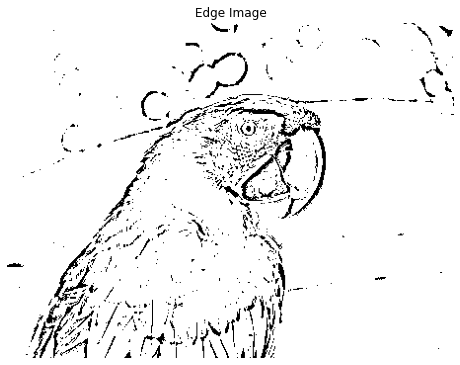

In [8]:
img_edge = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)

plt.figure(figsize=(8,8))
plt.imshow(img_edge,cmap="gray")
plt.axis("off")
plt.title("Edge Image")
plt.show()

Smoothen Color Image

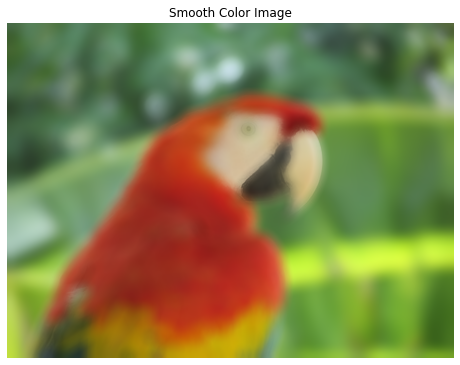

In [9]:
img_color_smooth = cv2.bilateralFilter(img, 19, 350, 350)

plt.figure(figsize=(8,8))
plt.imshow(img_color_smooth,cmap="gray")
plt.axis("off")
plt.title("Smooth Color Image")
plt.show()

SuperImpose Edges from Edge image on Smooth Color Image using opencv bitwise_and

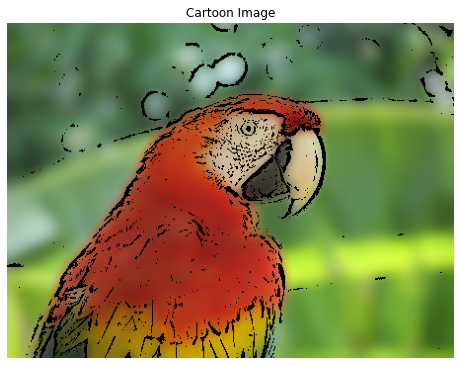

In [10]:
cartoon_img = cv2.bitwise_and(img_color_smooth, img_color_smooth, mask=img_edge)

plt.figure(figsize=(8,8))
plt.imshow(cartoon_img,cmap="gray")
plt.axis("off")
plt.title("Cartoon Image")
plt.show()

##                                 Custom Social Media Filter: Shades Of Orange

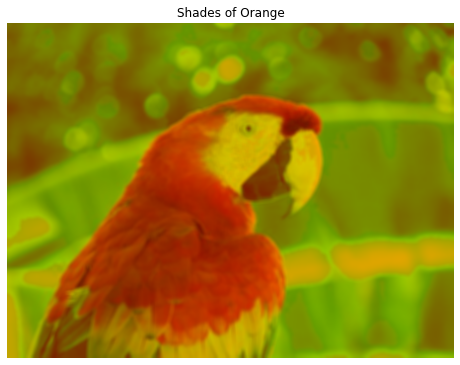

In [11]:
#split color channels 
(R, G, B) = cv2.split(img)

#remove all blue and reduce high values of green and increase low values of blue to create a net orangy effect 
B = B * 0
R[R < 100] = 120
G[G > 200] = 165

merged = cv2.merge([R, G, B])  #Merge channels back

#blur image after merging it back
filter_size = (int(0.015 * img.shape[0]), int(0.015 * img.shape[0]))
merged_blurred = cv2.GaussianBlur(merged, filter_size, cv2.BORDER_REFLECT)

plt.figure(figsize=(8,8))
plt.imshow(merged_blurred,cmap="gray")
plt.axis("off")
plt.title("Shades of Orange")
plt.show()

# Big Picture

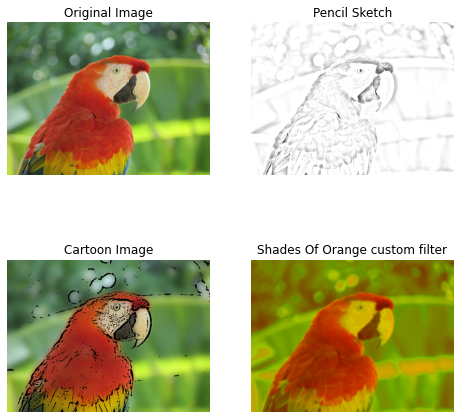

In [12]:
plt.figure(figsize=(8,8))

plt.subplot(2, 2, 1)
plt.imshow(img)
plt.axis("off")
plt.title("Original Image")

plt.subplot(2, 2, 2)
plt.imshow(pencil_sketch, cmap="gray")
plt.axis("off")
plt.title("Pencil Sketch")

plt.subplot(2, 2, 3)
plt.imshow(cartoon_img)
plt.axis("off")
plt.title("Cartoon Image")

plt.subplot(2, 2, 4)
plt.imshow(merged_blurred)
plt.axis("off")
plt.title("Shades Of Orange custom filter")

plt.show()